In [1]:
from utils.DataManager import DataManager
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data_manager = DataManager(r'C:\Users\vnaza\OneDrive\Documentos\Projetos\ClassifierCompetition\data\Train.xlsx')

In [3]:
df = data_manager.get_original_df()
df.head()

df['Class'].value_counts(normalize=True) * 100

Class
0    99.785059
1     0.214941
Name: proportion, dtype: float64

In [4]:
X_train, X_test, y_train, y_test = data_manager.train_test_splits(0.7)

y_train.value_counts(normalize=True) * 100

Class
0    99.785145
1     0.214855
Name: proportion, dtype: float64

In [35]:
from utils.CrossValidation import CrossValidation


logit = LogisticRegression(random_state=0, C=1)
cross_validation = CrossValidation(X_train, y_train, model=logit, n_splits=5)

params = [{
    # 'C': np.linspace(0, 10, 11),
    'class_weight': [{0:0.1, 1:0.9}, {0: 0.05, 1: 0.95}, {0: 0.01, 1: 0.99}, {0:1,1:10}, {0:1,1:100}],
    'fit_intercept': [True,False]
}]

best_logit, best_params = cross_validation.grid_search(params=params, scoring='recall')

logit = LogisticRegression().set_params(**best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
LogisticRegression(C=1, class_weight={0: 1, 1: 100}, fit_intercept=False,
                   random_state=0)


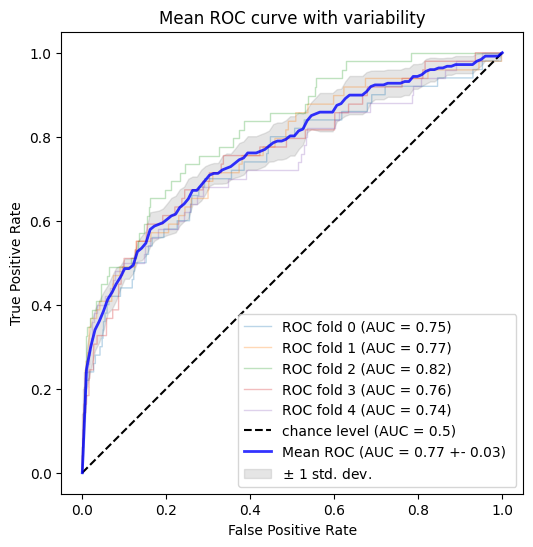

In [36]:
cross_validation.roc_cv_visualization(model=logit)

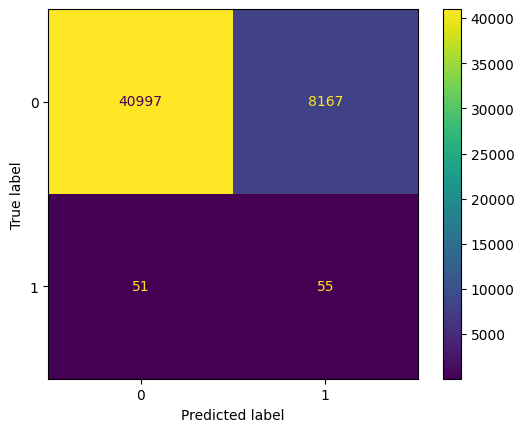

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     49164
           1       0.01      0.52      0.01       106

    accuracy                           0.83     49270
   macro avg       0.50      0.68      0.46     49270
weighted avg       1.00      0.83      0.91     49270

F1-Score: 0.013208453410182517
AUC Score: 0.7162807423133662


In [37]:
from sklearn.metrics import f1_score

yhat = logit.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=yhat, labels= best_logit.classes_)
c = ConfusionMatrixDisplay(confusion_matrix = conf_matrix).plot()
plt.show()

print(classification_report(y_test, yhat))
print('F1-Score:', f1_score(y_test, yhat))
print('AUC Score:', roc_auc_score(y_test, best_logit.decision_function(X_test)))


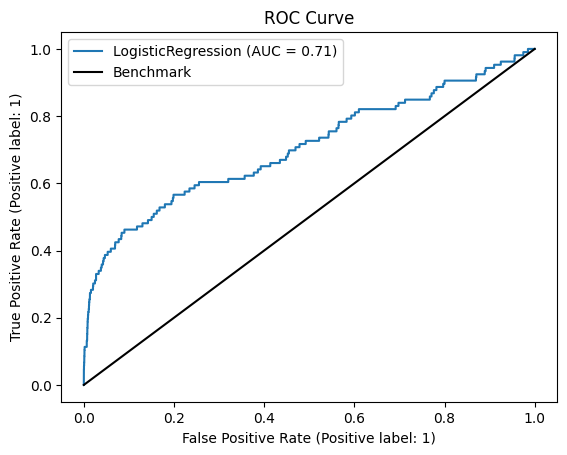

In [38]:

RocCurveDisplay.from_estimator(logit, X_test, y_test)
plt.plot([0,1],[0,1],'k-',label='Benchmark')
plt.title('ROC Curve')
plt.legend()
plt.show()